# Section 1: EDA 

# 1. import dependencies

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# 2. Load the Dataset and brief overview

In [34]:
# create df out of the raw csv
df = pd.read_csv("hr_employee_churn_data.csv")

In [35]:
# initialy lets check how the data is look like: 
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


as we can see we have: 

    - 14,999 rows(samples)
    - 10 columns (features)
        - 8 numerical features 
        - 1 categorical features
        - 1 numerical dependent feature (AKA label) = 'left'

In [36]:
df.info(verbose=True)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB
(14999, 10)


we will use the 'Describe' utility of pandas to get a better overview understanding on the dataset. 


In [37]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


We would like to start the EDA on the categorical features in the dataset. 
after examine the dataframe we can see that there are more categorical features in numeric form which are: 

1. Work_accident 
    - 2 distinct categories [0,1]
2. promotion_last_5years
    - 2 distinct categories [0,1]

and our initialy categorical feature: 

3. salary
    - 3 distinct categories ['low' 'medium' 'high']

In [38]:
print(df['Work_accident'].unique()) # 2 distinct categories
print(df['promotion_last_5years'].unique()) # 2 distinct categories
print(df['salary'].unique()) # 3 distinct categories

[0 1]
[0 1]
['low' 'medium' 'high']


# 3. Search & Resolve Nans values

- first step we will explore which data is missing. 
- second step we will fill the Nans values with the appropriate way.

In [39]:
# listing the number of missing values in each feature.(and target.)
df.isnull().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

As we can see only satisfaction_level contains missing data.

we will explore this feature: 

In [40]:
df['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [41]:
# as we can see at section 5 we will like to use our median for filling the Nans. (for keep the gaussian dist)
df['satisfaction_level'].fillna(df['satisfaction_level'].median(), inplace=True) 

## 3. Checking the distributions of the Categorical Features:
-----------------------------------------------------------------------------

for this section of analysis we will use two main plots: 
1. countplot plot 
    - anable to see how the data is distributed among each category of feature.
    - anable to see how the data is distributed in correlation to the targets.

steps fetures: 
1. 'left'  --> the distribution of the targets in the dataset.
2. 'salary'
3. 'promotion_last_5years'
4. 'Work_accident'

### 3.1 distribution of the targets in the dataset.

0.76% have label 0.
0.24% have label 1.


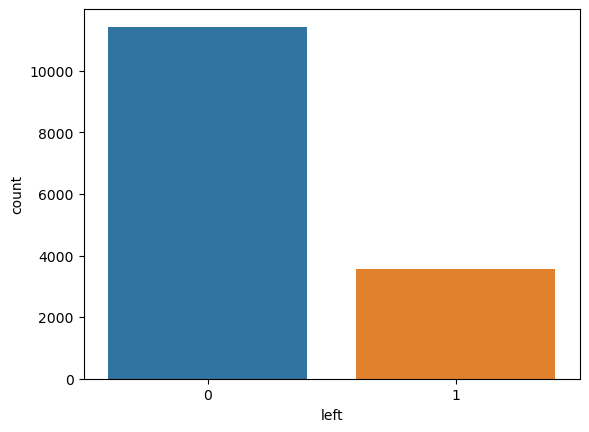

In [42]:
# check total employee range based on the target column that left
zero_val_left = len(df[df['left'] == 0]) / len(df)
print(f"{round(zero_val_left,2)}% have label 0.\n{round(1-zero_val_left,2)}% have label 1.")
sns.countplot(x='left', data=df)
plt.show()

##### ** observation **
Less people left their job than didn't.
we have <b>Imbalanced<b> data which we will need to adress.



### 3.2 distribution of salary feature

0.49% have label low.
0.43% have label medium
0.08% have label high


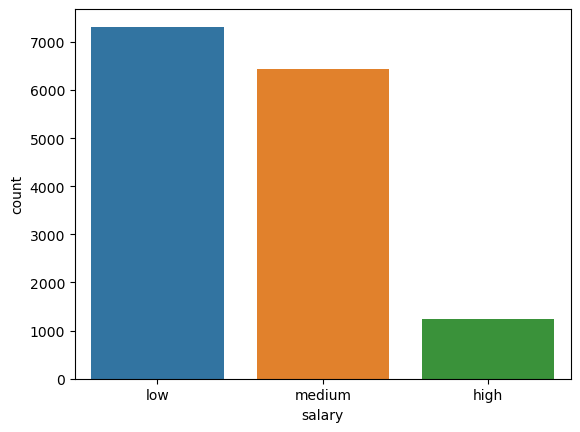

In [43]:
# check total employee range based on salary feature
l_df = len(df)
cat_list =  df['salary'].unique()
x = [len(df[df['salary'] == f]) / l_df for f in cat_list]

print(f"{round(x[0],2)}% have label {cat_list[0]}.\n{round(x[1],2)}% have label {cat_list[1]}\n{round(x[2],2)}% have label {cat_list[2]}")
sns.countplot(x='salary', data=df)
plt.show()

##### we will also want to see the relations of this feature to the target
as how the 'left' target is splits over the feature 'salary' 
for that I will use seaborn catplot.

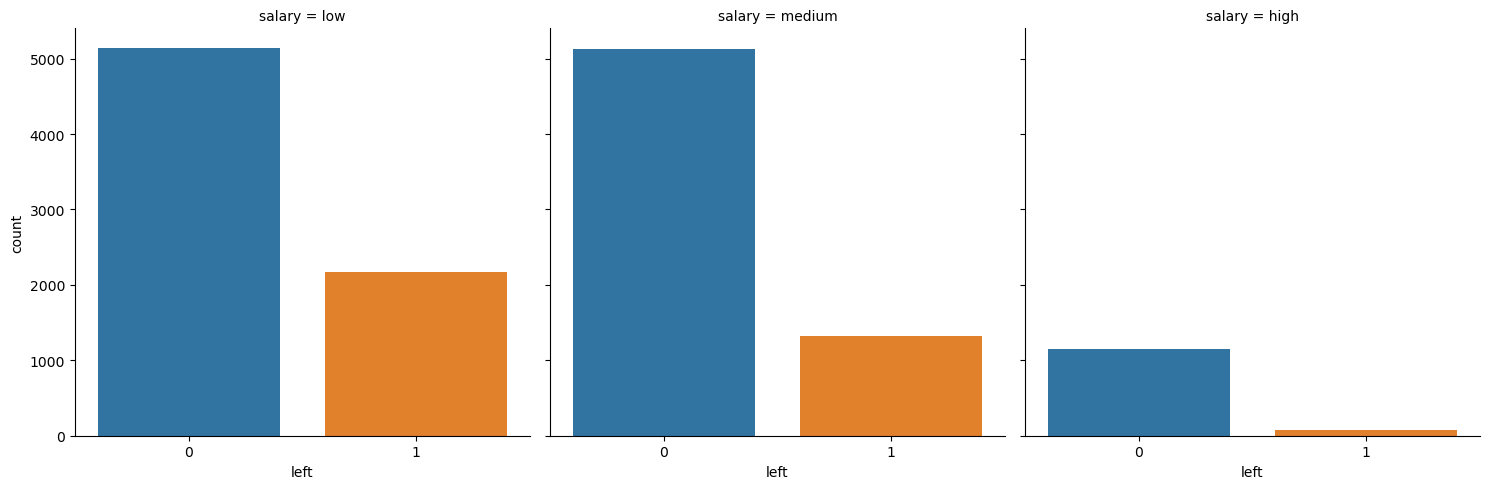

In [44]:
sns.catplot(x='left', col='salary', kind='count', data=df)

##### ** observation **
- low salaries are more common as the intuation suggested.
- in the low salaries we can see that the churning rate (employee who left) is higher than the med or high salaries. 



### 3.3 distribution of the promotion_last_5years feature

0.98% have label 0.
0.02% have label 1


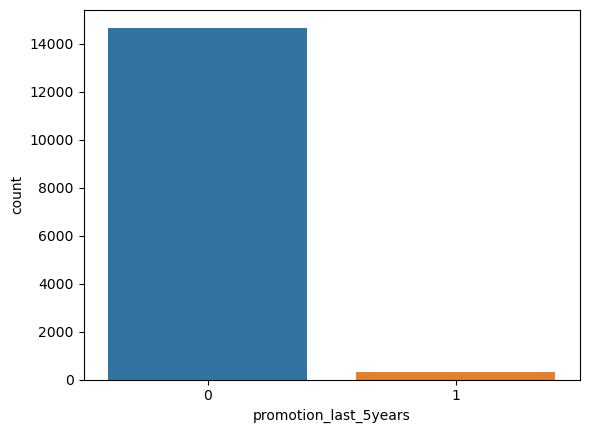

In [45]:
# check total employee range based on promotion_last_5years feature
l_df = len(df)
cat_list =  df['promotion_last_5years'].unique()
x = [len(df[df['promotion_last_5years'] == f]) / l_df for f in cat_list]

print(f"{round(x[0],2)}% have label {cat_list[0]}.\n{round(x[1],2)}% have label {cat_list[1]}")
sns.countplot(x='promotion_last_5years', data=df)
plt.show()

##### we will also want to see the relations of this feature to the target
as how the 'left' target is splits over the feature 'promotion_last_5years' 
for that I will use seaborn catplot.

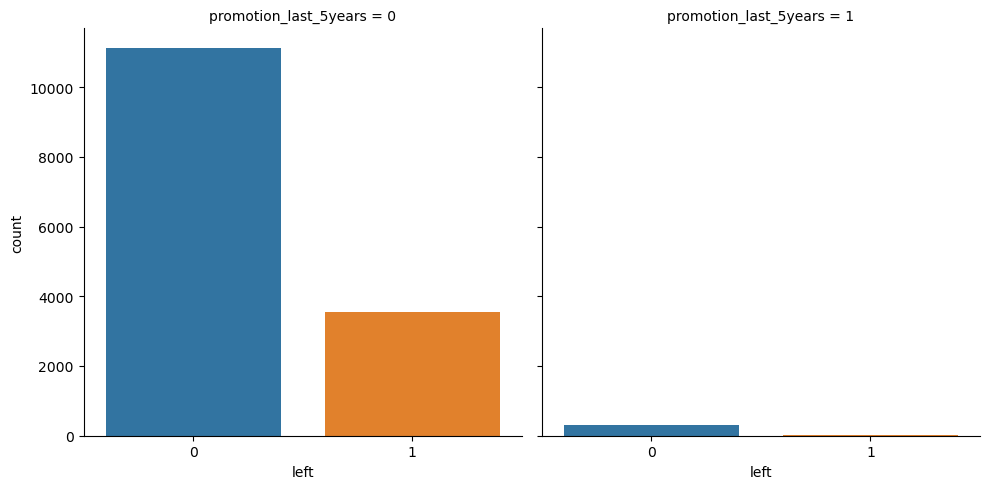

In [46]:
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df)

##### ** observation **
- non-promoted employees count is high.
- it seems that non promoted people left more.


### 3.4 distribution of the Work_accident feature

0.86% have label 0.
0.14% have label 1


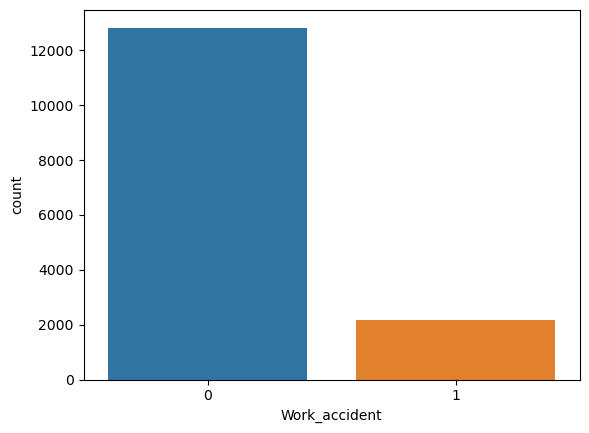

In [47]:
# check total employee range based on Work_accident feature
l_df = len(df)
cat_list =  df['Work_accident'].unique()
x = [len(df[df['Work_accident'] == f]) / l_df for f in cat_list]

print(f"{round(x[0],2)}% have label {cat_list[0]}.\n{round(x[1],2)}% have label {cat_list[1]}")
sns.countplot(x='Work_accident', data=df)
plt.show()

##### we will also want to see the relations of this feature to the target
as how the 'left' target is splits over the feature 'Work_accident' 
for that I will use seaborn catplot.

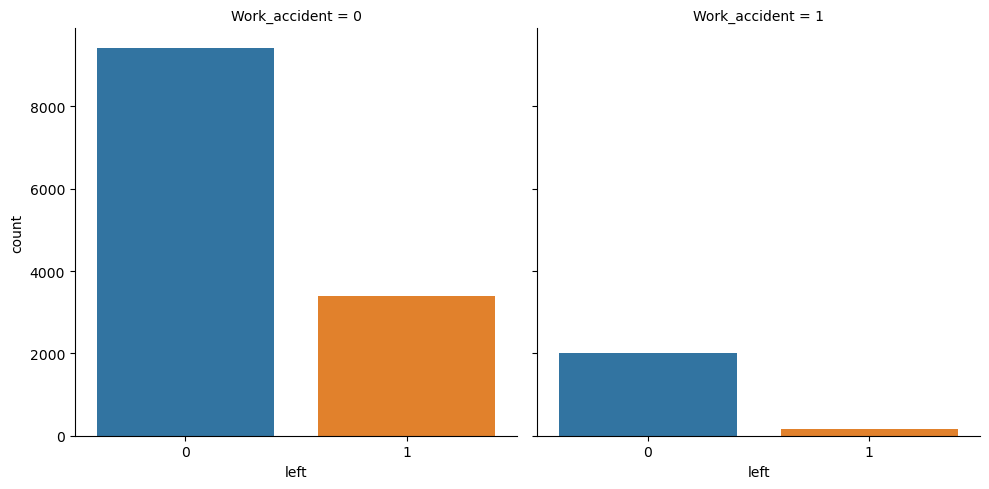

In [48]:
sns.catplot(x='left', col='Work_accident', kind='count', data=df)

##### ** observation **
- it seems that this feature have a little impact on the target.

    the percentage of people who left the company is stayed in same porportions if they had or not had an accident. 

### conclusions on the cataorical features: 
--------------------------------------------
- low salaries are more common as the intuation suggested.
- low salaries indicates higher churning rate (employee who left) than the med or high salaries.
- non-promoted employees count is high.
- non promoted people left more.
- Work_accident feature not have strong impact on target. 

## 4. Checking the distributions of the numrical Features:
----------------------------------------------------------------------

for this section of analysis we will use two main plots: 
1. dist plot -> anable to see how the data is distributed of the feature values.
2. box plot  -> anable to see distribution of feature with respect to categorical target.


steps fetures: 
* empid -> will not used as it un-informational feature.
1. satisfaction_level
2. last_evaluation
3. number_project
4. average_montly_hours
5. time_spend_company


### 4.1 satisfaction_level

C:\Users\dorge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

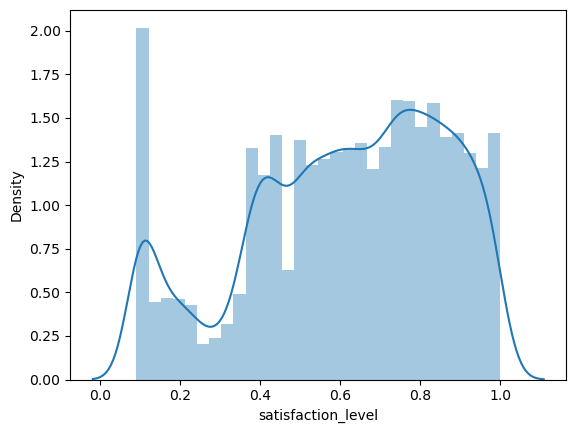

In [49]:
#plot the univariant distribute of observations
sns.distplot(df['satisfaction_level'])

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

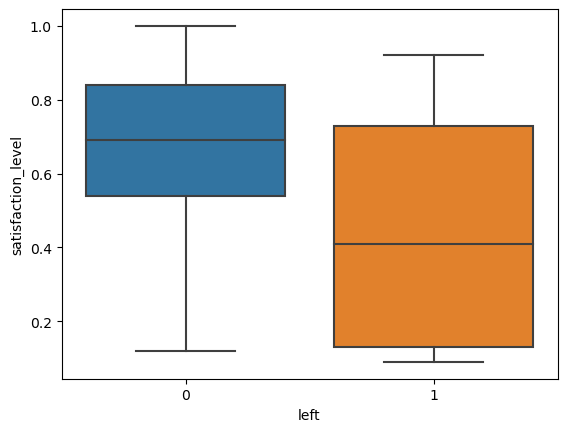

In [50]:
sns.boxplot(x='left', y='satisfaction_level', data=df)

##### ** observation **
distribution plot:
- range of the satisfaction values is [0.09 to 1.0]
- it not so normaly distributed. with peak of 358 samples at 0.1.
- 
box plot: 
- employees left the company where there satisfaction level ranged from 0.2 to 0.5 the most!

### 4.2 last_evaluation

C:\Users\dorge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

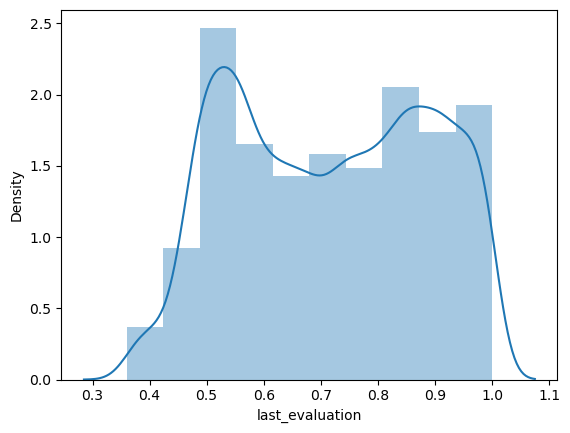

In [51]:
#plot the univariant distribute of observations
sns.distplot(df['last_evaluation'], bins=10)

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

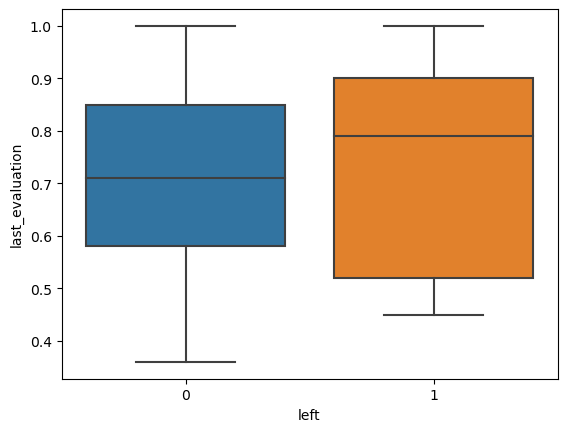

In [52]:
sns.boxplot(x='left', y='last_evaluation', data=df)

In [53]:
df['last_evaluation'].max()

1.0

##### ** observation **
distribution plot:
- range of the last_evaluation values is [0.36 to 1.0]
- there is high count at 0.5 ish.
- 
box plot: 
- there is not much impact of this feature on the target. 
- *slightly* higher evaluation tend to employee leaving.

### 4.3 number_project

C:\Users\dorge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_project', ylabel='Density'>

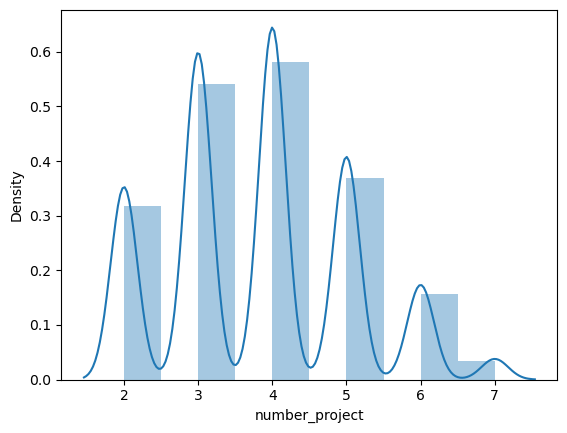

In [54]:
#plot the univariant distribute of observations
sns.distplot(df['number_project'], bins=10)

<AxesSubplot:xlabel='left', ylabel='number_project'>

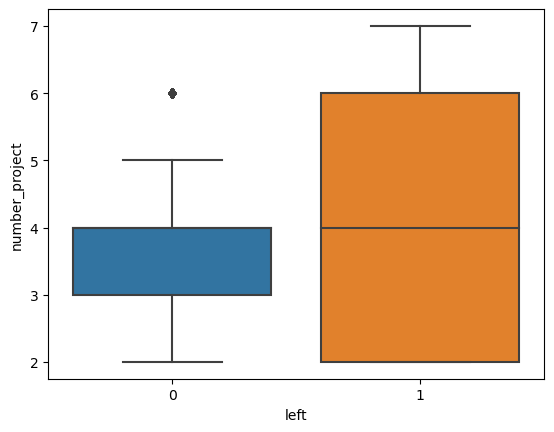

In [55]:
sns.boxplot(x='left', y='number_project', data=df)

##### ** observation **
distribution plot:
- range of the number_project values is [2 to 7]
- 4 is the most frequant.
- it seems that the data is in normal distribution. with slight left skewed.

- 
box plot: 
- employees 3 or 4 projects seems to left less than other number of projects.
- employees with higher amount of projects tend to leave more.

### 4.4 average_montly_hours

C:\Users\dorge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

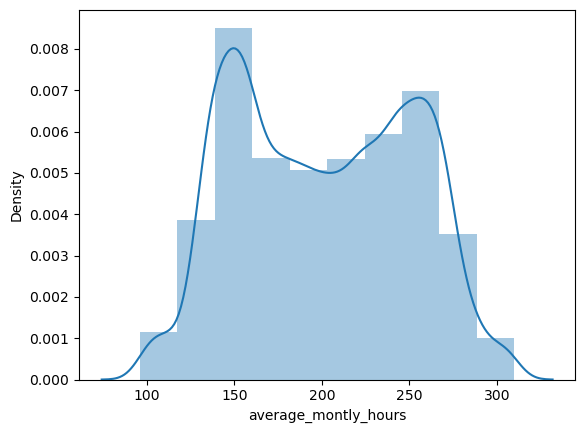

In [56]:
#plot the univariant distribute of observations
sns.distplot(df['average_montly_hours'], bins=10)

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

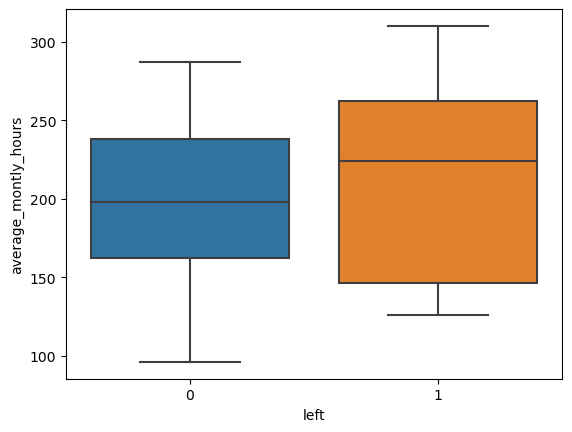

In [57]:
sns.boxplot(x='left', y='average_montly_hours', data=df)

In [58]:
df['average_montly_hours'].max()

310

##### ** observation **
distribution plot:
- range of the number_project values is [96 to 310]
- it seems high count at value 150 hours.

- 
box plot: 
- employees with higher hours per month tend to leave more.

### 4.5 time_spend_company

C:\Users\dorge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_spend_company', ylabel='Density'>

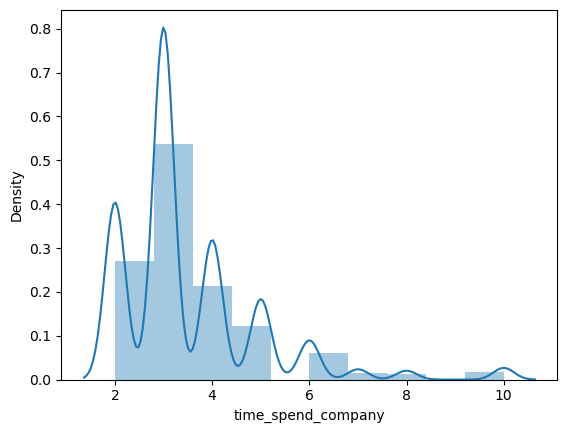

In [59]:
#plot the univariant distribute of observations
sns.distplot(df['time_spend_company'], bins=10)

<AxesSubplot:xlabel='left', ylabel='time_spend_company'>

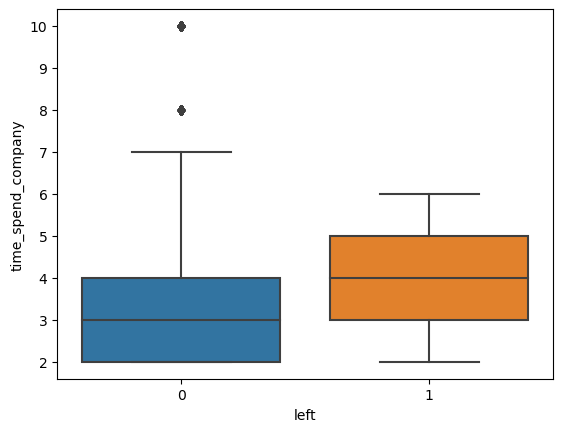

In [60]:
sns.boxplot(x='left', y='time_spend_company', data=df)

In [61]:
df['time_spend_company'].max()

10

##### ** observation **
distribution plot:
- range of the time_spend_company values is [2 to 10]
- it seems high count at 3.
- it seems low count from 6 and some outliars from 7.
- the data is heavily left skewed. 
- 
box plot: 
- employees with higher time_spend_company tend to leave more.

## 5. Checking the correlation between the Features:
----------------------------------------------------------------------

for this section of analysis we will use:
- heat map.
- pairplot

<AxesSubplot:>

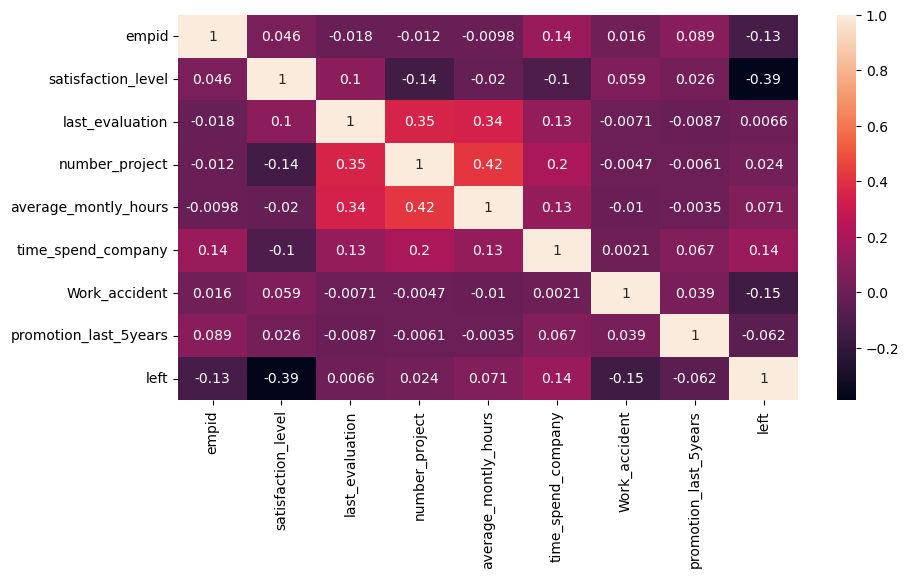

In [62]:
# creating correlation heatmap using seaborn lib. 
cor_mat=df.corr()
fig=plt.figure(figsize=(10,5))
sns.heatmap(data=cor_mat,annot=True)

##### ** observation **
- high correlations:
    -positive correlation:
        - last_evaluation       <--> number_projects (0.35)
        - last_evaluation       <--> average_monthly_hours (0.34)
        - number_projects       <--> average_monthly_hours (0.42)
    -strong correlation to target: 
        - satisfaction_level

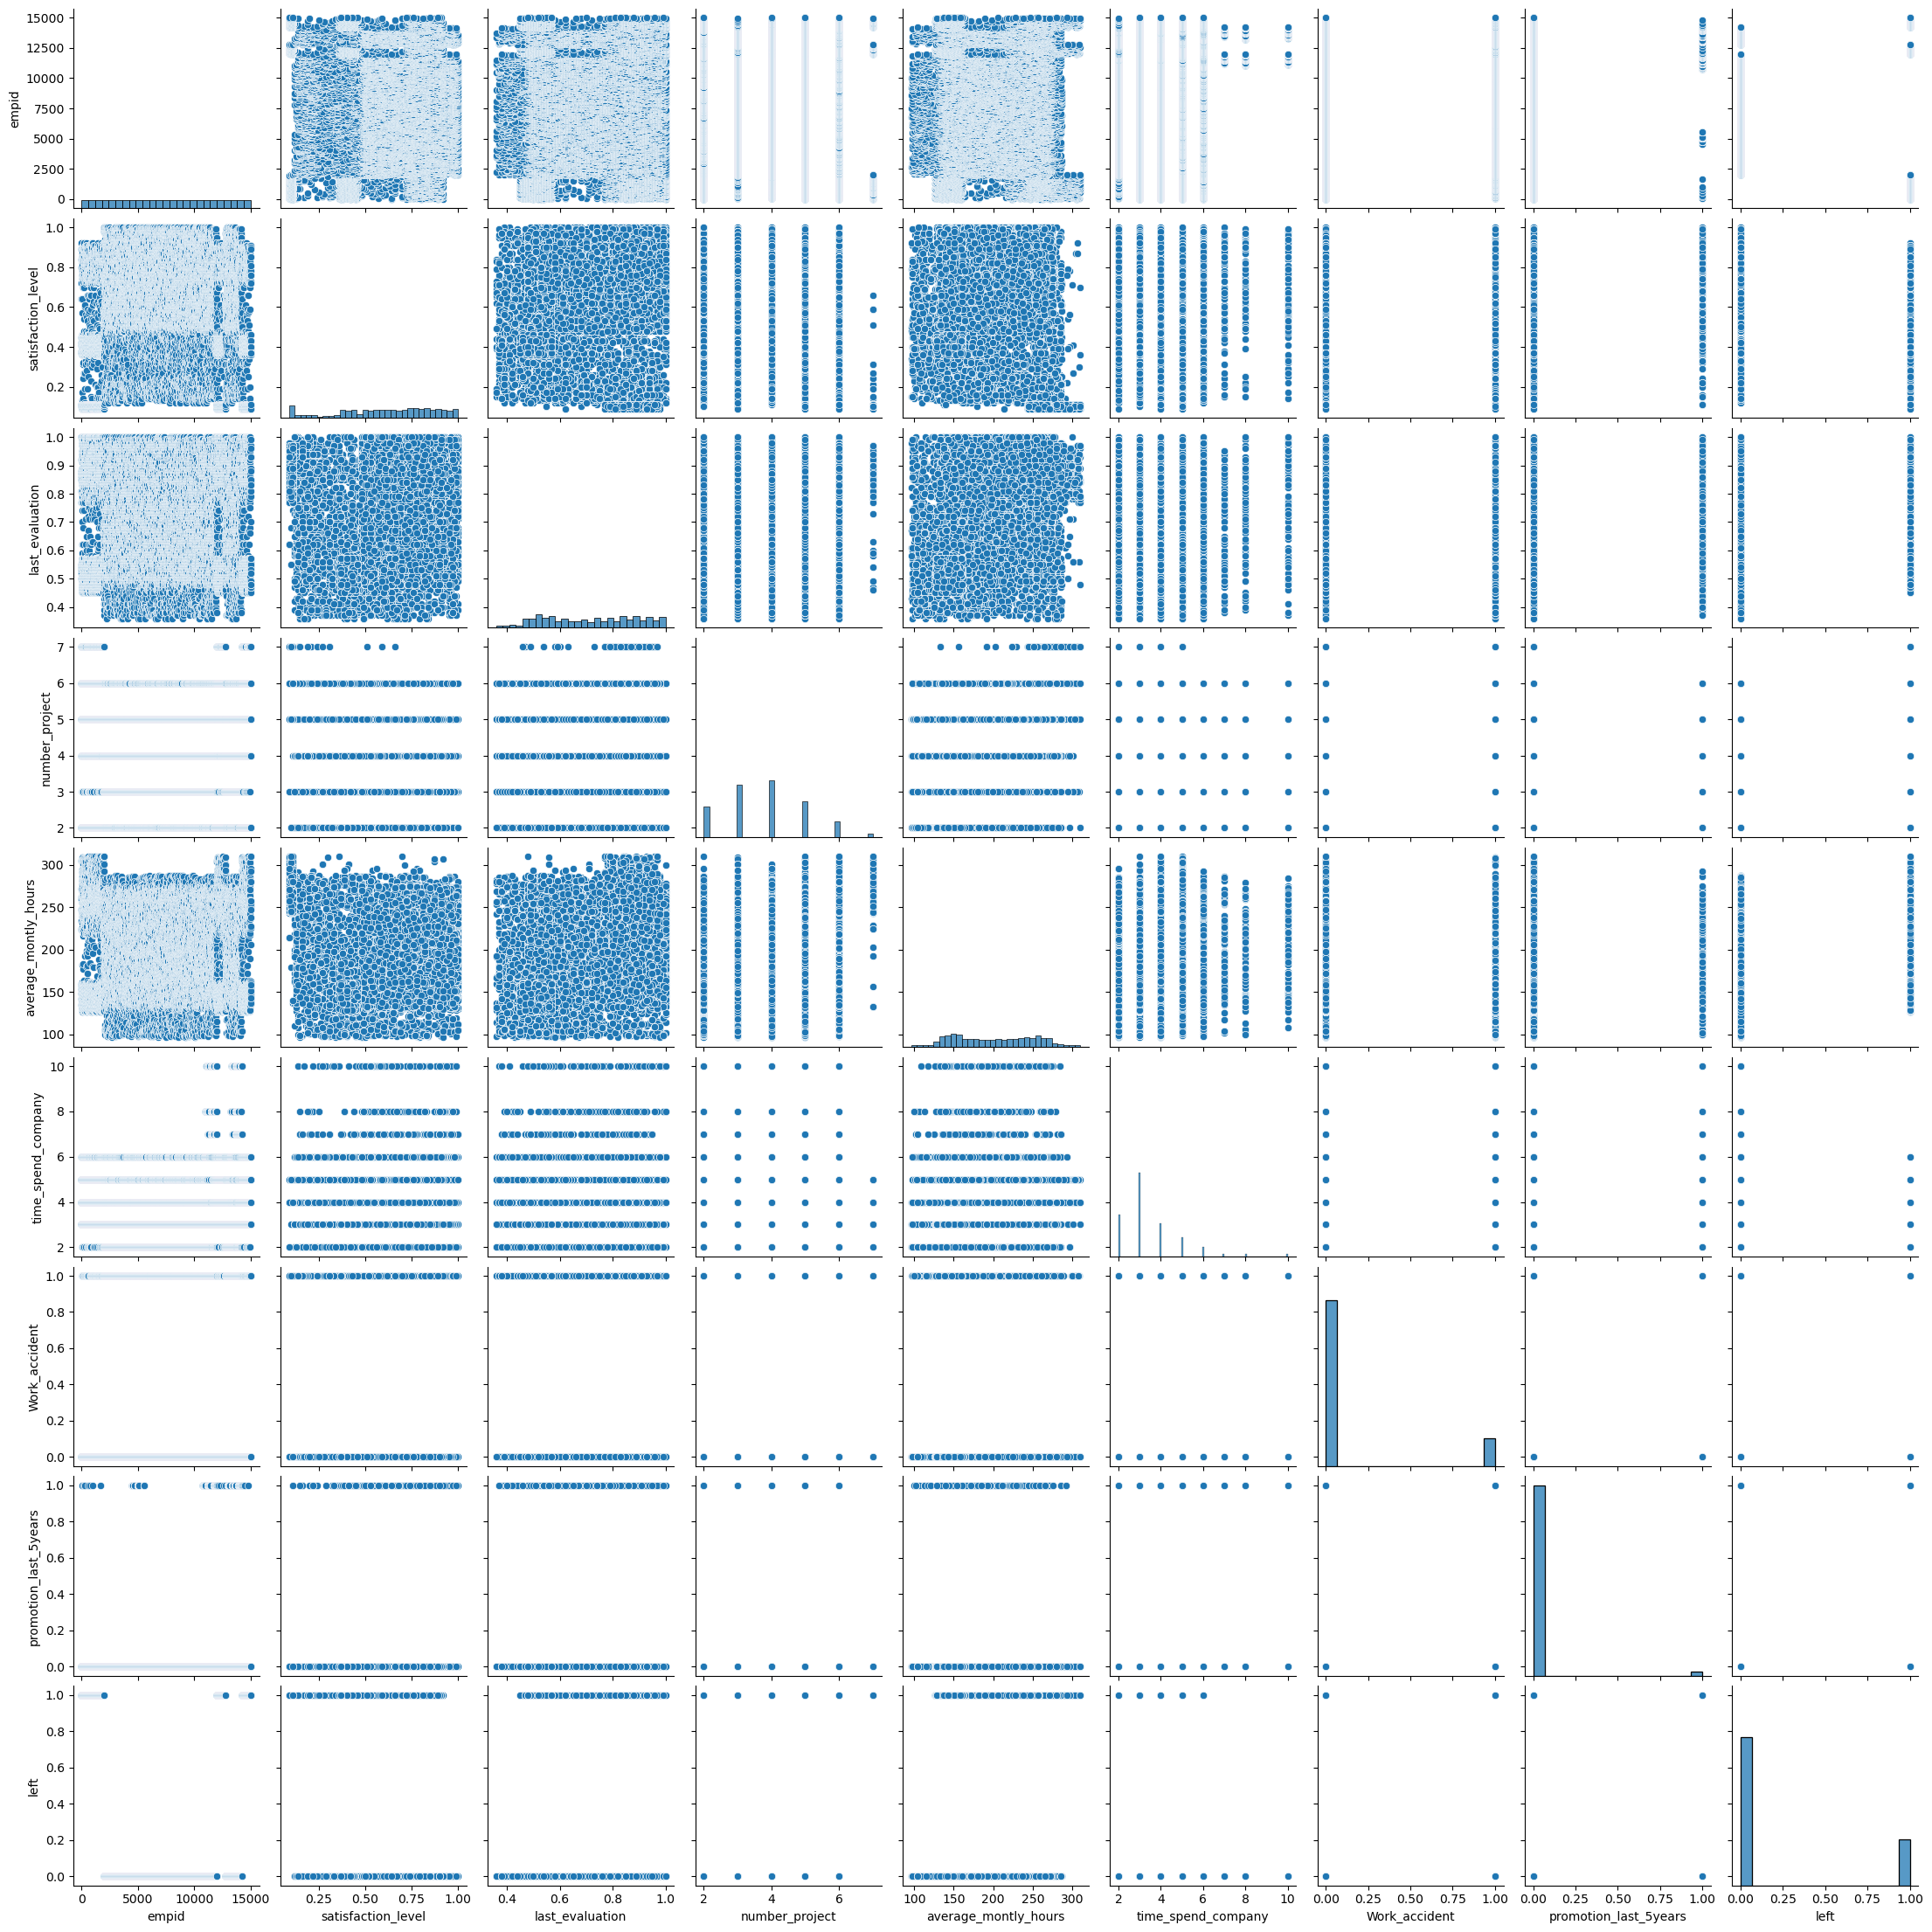

In [63]:
# checking for pairplot 
# we would like to see the correltion of pairs of features.
sns.pairplot(df)